In [1]:
import os
if not os.path.exists('DDIM'):
  !git clone https://github.com/COMP6248-Reproducability-Challenge/DDIM.git
  import sys
  if not 'DDIM' in sys.path:
      sys.path += ['DDIM']
if not os.path.exists('cifar10_uncond_50M_500K.pt'):
  !wget https://openaipublic.blob.core.windows.net/diffusion/march-2021/cifar10_uncond_50M_500K.pt

fatal: destination path 'DDIM' already exists and is not an empty directory.
--2021-05-08 03:57:03--  https://openaipublic.blob.core.windows.net/diffusion/march-2021/cifar10_uncond_50M_500K.pt
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.150.77.132
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.150.77.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210292511 (201M) [application/octet-stream]
Saving to: ‘cifar10_uncond_50M_500K.pt.1’

cifar10_uncond_50M_ 100%[===================>] 200.55M  18.0MB/s    in 15s     

2021-05-08 03:57:18 (13.6 MB/s) - ‘cifar10_uncond_50M_500K.pt.1’ saved [210292511/210292511]



In [10]:
import torch
import numpy as np
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

from DDIM.model import DenoisingDiffusionNet,extract
from DDIM.DenoisingNet import UNetModel
%matplotlib inline

In [3]:
device = torch.device("cuda")
states = torch.load(
    "cifar10_uncond_50M_500K.pt",
    map_location=device,
)
denoise_model = UNetModel(
    in_channels=3,
    model_channels=128,
    out_channels=6,
    num_res_blocks=3,
    attention_resolutions=(2,4),
    dropout=0.3,
    channel_mult=(1, 2, 2, 2),
    num_classes=None,
    use_checkpoint=False,
    num_heads=4,
    num_heads_upsample=-1,
    use_scale_shift_norm=True,
)
denoise_model.load_state_dict(states)
denoise_model = denoise_model.cuda()

model = DenoisingDiffusionNet(1000,denoise_model)
model = model.cuda()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


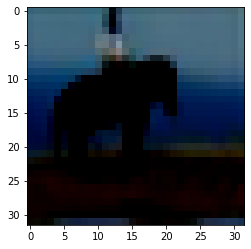

In [14]:
img = model.sample(device)
plt.imshow(img.permute(1, 2, 0))